### Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib.
- Загрузите "Boston House Prices dataset" из встроенных наборов
данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
- Масштабируйте данные с помощью StandardScaler.
- Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [2]:
# Загрузка данных
""" Вместо набора данных "Boston House Prices", который устарел, 
мы будем использовать набор данных "Iris", который подходит для задачи кластеризации."""

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)  # Признаки
y = pd.DataFrame(iris.target, columns=['species'])      # Метки классов


In [3]:
# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
# Применение t-SNE
# Уменьшаем размер тренировочной выборки для ускорения
X_train_reduced, _, y_train_reduced, _ = train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=42)

# Применяем t-SNE к уменьшенной выборке
tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_reduced)


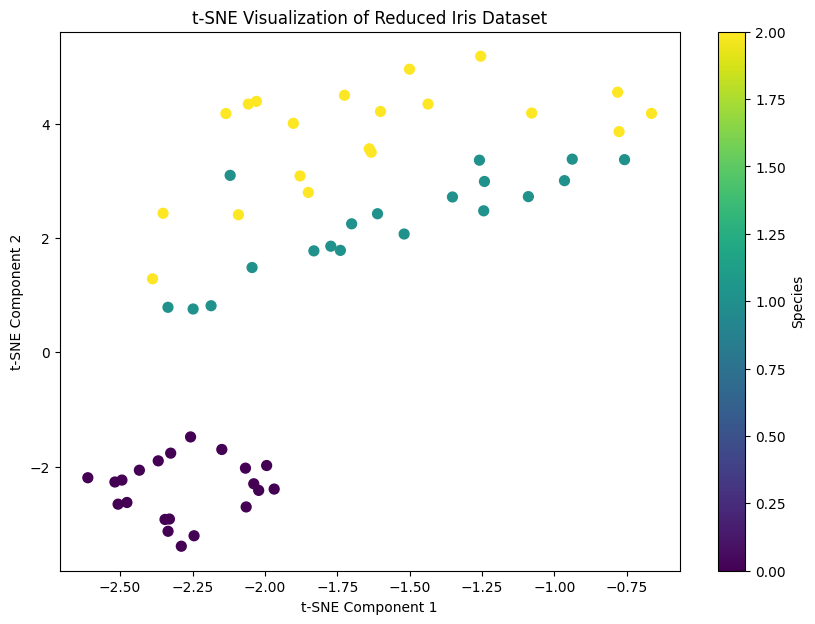

In [5]:
# Визуализация
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train_reduced.values.flatten(), cmap='viridis', s=50)
plt.colorbar(label='Species')
plt.title('t-SNE Visualization of Reduced Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Задание 2
- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
- Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.

Для выполнения второго задания, будем использовать алгоритм KMeans для разделения данных на три кластера. 
После этого визуализируем результаты кластеризации с помощью t-SNE и раскрасим точки на графике соответственно их принадлежности кластерам. Вычислим средние значения признаков price и CRIM для каждого кластера.


In [9]:
from sklearn.cluster import KMeans

# Обучение KMeans на уменьшенной выборке
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train_reduced)

# Предсказания кластеров для уменьшенной тренировочной выборки
clusters_reduced = kmeans.predict(X_train_reduced)


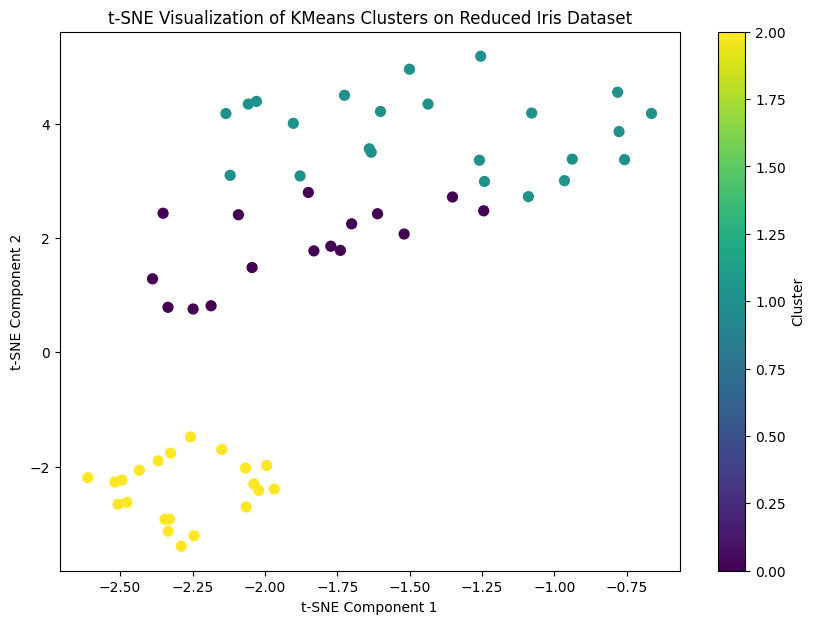

In [10]:
# Визуализация t-SNE с цветовой индикацией кластеров
plt.figure(figsize=(10, 7))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=clusters_reduced, cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of KMeans Clusters on Reduced Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


In [11]:
# Вычисление средних значений для каждого кластера
# Добавляем предсказанные кластеры в датафрейм уменьшенной выборки
X_train_reduced_df = pd.DataFrame(X_train_reduced, columns=X.columns)
X_train_reduced_df['Cluster'] = clusters_reduced
y_train_reduced['Cluster'] = clusters_reduced

# Рассчитаем средние значения признаков в кластерах
cluster_means = X_train_reduced_df.groupby('Cluster').mean()

# Выводим средние значения для каждого кластера
print(cluster_means)

         sepal length (cm)  sepal width (cm)  petal length (cm)  \
Cluster                                                           
0                -0.125452         -0.794675           0.307063   
1                 1.144197          0.212086           0.988814   
2                -0.829625          1.214305          -1.308752   

         petal width (cm)  
Cluster                    
0                0.264189  
1                1.055306  
2               -1.236326  
